# For 10 Variables

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay

In [14]:
# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [15]:

# Generate XOR dataset with 10 variables
np.random.seed(42)
X = np.random.randint(0, 2, (1000, 10))  # 1000 samples, 10 features
Y = np.array([np.bitwise_xor.reduce(x) for x in X]).reshape(-1, 1)  # XOR of all features

In [32]:
X

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]])

In [33]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [24]:
# Initialize weights and biases
input_size = 10
hidden_size = 3
output_size = 1
learning_rate = 0.01
epochs = 5000

In [25]:
w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, hidden_size)
b2 = np.zeros((1, hidden_size))
w3 = np.random.randn(hidden_size, output_size)
b3 = np.zeros((1, output_size))

In [26]:
losses = []

In [27]:
# Training loop
for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    
    z3 = np.dot(a2, w3) + b3
    a3 = sigmoid(z3)
    
    # Compute loss (Cross-Entropy)
    loss = -np.mean(Y * np.log(a3 + 1e-8) + (1 - Y) * np.log(1 - a3 + 1e-8))
    losses.append(loss)
    
    # Backpropagation
    dz3 = a3 - Y
    dw3 = np.dot(a2.T, dz3) / len(Y)
    db3 = np.mean(dz3, axis=0, keepdims=True)
    
    dz2 = np.dot(dz3, w3.T) * sigmoid_derivative(a2)
    dw2 = np.dot(a1.T, dz2) / len(Y)
    db2 = np.mean(dz2, axis=0, keepdims=True)
    
    dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(a1)
    dw1 = np.dot(X.T, dz1) / len(Y)
    db1 = np.mean(dz1, axis=0, keepdims=True)
    
    # Update weights
    w3 -= learning_rate * dw3
    b3 -= learning_rate * db3
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1

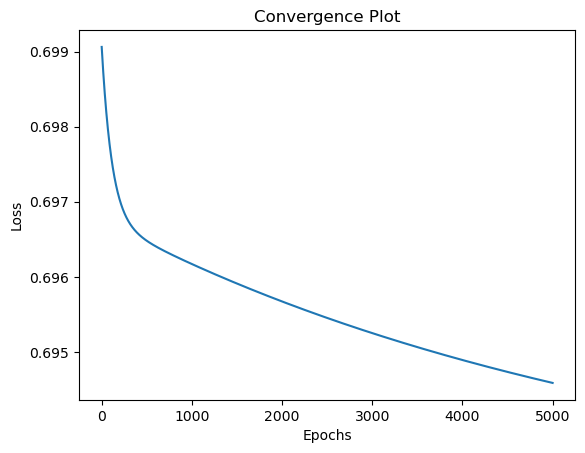

In [28]:
# Plot convergence
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Convergence Plot")
plt.show()

In [29]:
# Predictions
predictions = (a3 >= 0.5).astype(int)

Confusion Matrix:
[[210 281]
 [221 288]]


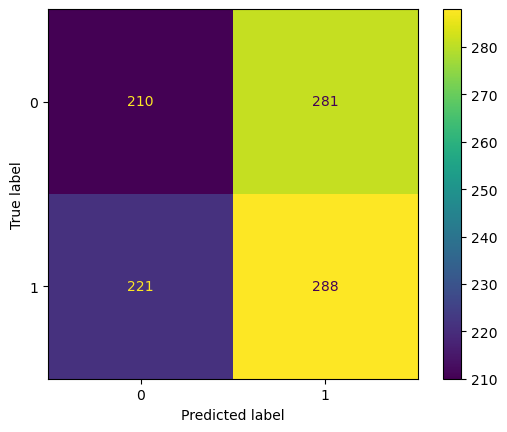

In [30]:
# Compute confusion matrix and metrics
cm = confusion_matrix(Y, predictions)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [31]:
print("\nClassification Report:")
print(classification_report(Y, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       491
           1       0.51      0.57      0.53       509

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.50      0.50      0.50      1000

